In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
transactions = pd.read_excel(r'files\transaction_data.xls')
temp = transactions
# temp.head() #not printing for privacy reasons

In [4]:
day = [day[6:] for day in transactions['valuedate'][:].astype(str)]
month = [month[4:6] for month in transactions['valuedate'][:].astype(str)]
year = [year[:4] for year in transactions['valuedate'][:].astype(str)]

In [5]:
temp.drop(columns = ['accountNumber','mutationcode','transactiondate','valuedate'], inplace=True)

In [6]:
temp['day'] = day
temp['month'] = month
temp['year'] = year
# temp['description'] = desc_summary
temp = temp.reindex(['day','month','year','startsaldo','endsaldo','amount','description'], axis=1)

In [7]:
# expenditure and income 
#TODO: 
# add use of description here-- expenses coming in and going to savings should not be counted
# add the funcionality to select the date range based on a given range option

# select time period
month_inp = "08"
year_inp = "2023"

# make conditions
time_cond = (temp['month'] == month_inp) & (temp["year"] == year_inp)
expenses_cond = (temp['amount'] < 0)
income_cond = (temp['amount'] > 0)

# variables to plot
days_exp = temp[time_cond & expenses_cond]["day"]
expenses = np.array(temp[expenses_cond & time_cond]['amount'])
income = np.array(temp[income_cond & time_cond]['amount'])


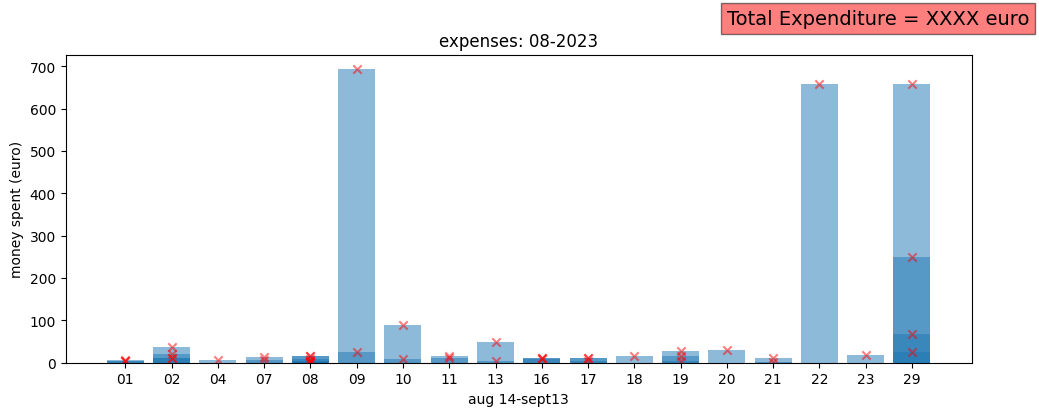

<Figure size 640x480 with 0 Axes>

In [8]:
# plotting expenses
plt.figure(figsize=(11.69,4))
plt.bar(days_exp, -expenses, alpha=0.5)
plt.scatter(days_exp,-expenses, marker='x', color='red',alpha=0.5)
plt.title(f'expenses: {month_inp}-{year_inp}')
plt.xlabel('aug 14-sept13')
plt.ylabel('money spent (euro)')

plt.text(13, 800, 'Total Expenditure = XXXX euro', fontsize = 14, 
         bbox = dict(facecolor = 'red', alpha = 0.5)) # in your notebook, replace XXXX with temp['amount'].sum()
plt.show()
plt.tight_layout()